# Capstone Project - Are Fandango's Movie Ratings Inflated? 
## Overview

When planning on seeing a movie, how well can you trust online reviews and ratings? What if the online reviwer company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies for the sake of higher profit?

----
### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.simplefilter('ignore')

## Part One: Exploring Fandango Displayed Scores versus True User Ratings

Let's explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

fandango.columns= fandango.columns.str.lower()
fandango.rename(columns = {'stars': 'fandango_stars', 'rating': 'fandango_true_rating'}, inplace= True)

Is there a relationship between popularity of a film and its rating?

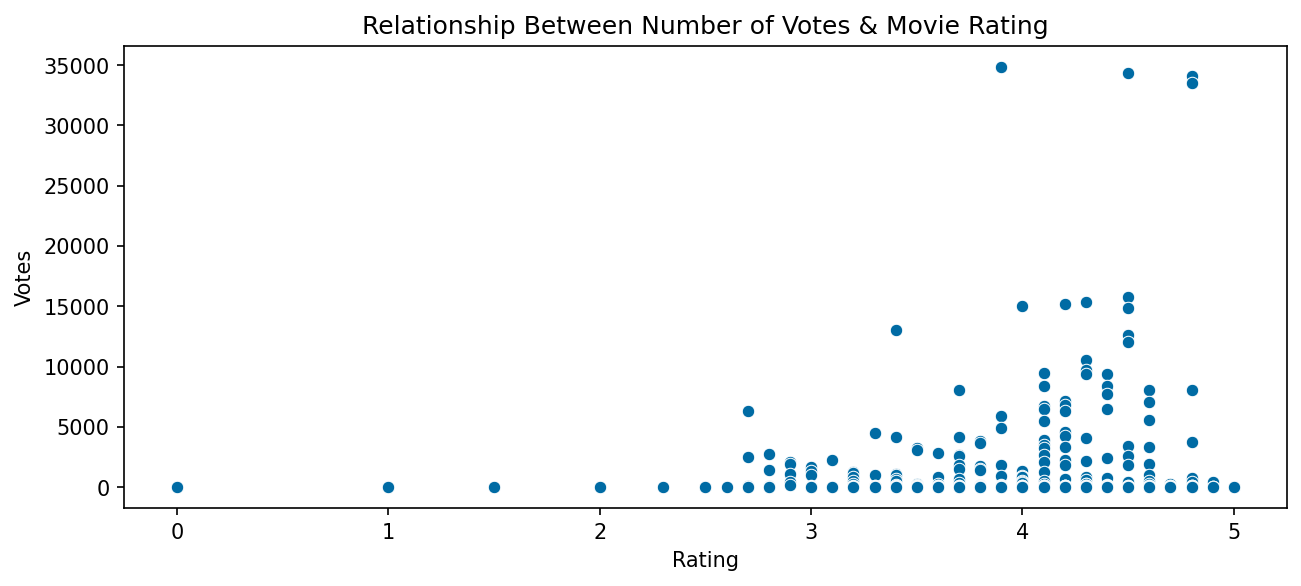

In [4]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fandango,x='fandango_true_rating',y='votes')
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.title('Relationship Between Number of Votes & Movie Rating');

In [5]:
# Remove special characters from columns to make presentation cleaner
spec_chars = ["_"]

def ChangeCharacters(df):
    for char in spec_chars:
        df.columns = df.columns.str.replace(char, ' ').str.title()
        return df

In [6]:
print("Correlation Between Stars, Ratings, & Votes")
corr = fandango.corr()
corr.pipe(ChangeCharacters)

for char in spec_chars:
    corr.index = corr.index.str.replace(char, ' ').str.title()
corr

Correlation Between Stars, Ratings, & Votes


,Fandango Stars,Fandango True Rating,Votes
Fandango Stars,1.000000,0.994696,0.164218
Fandango True Rating,0.994696,1.000000,0.163764
Votes,0.164218,0.163764,1.000000


Based on our figures, there is a small correlation between number of viewer votes and movie ratings. 

In [7]:
fandango['year'] = fandango['film'].apply(lambda title:title.split('(')[-1].replace(')', ''))

What is count of movies per year?

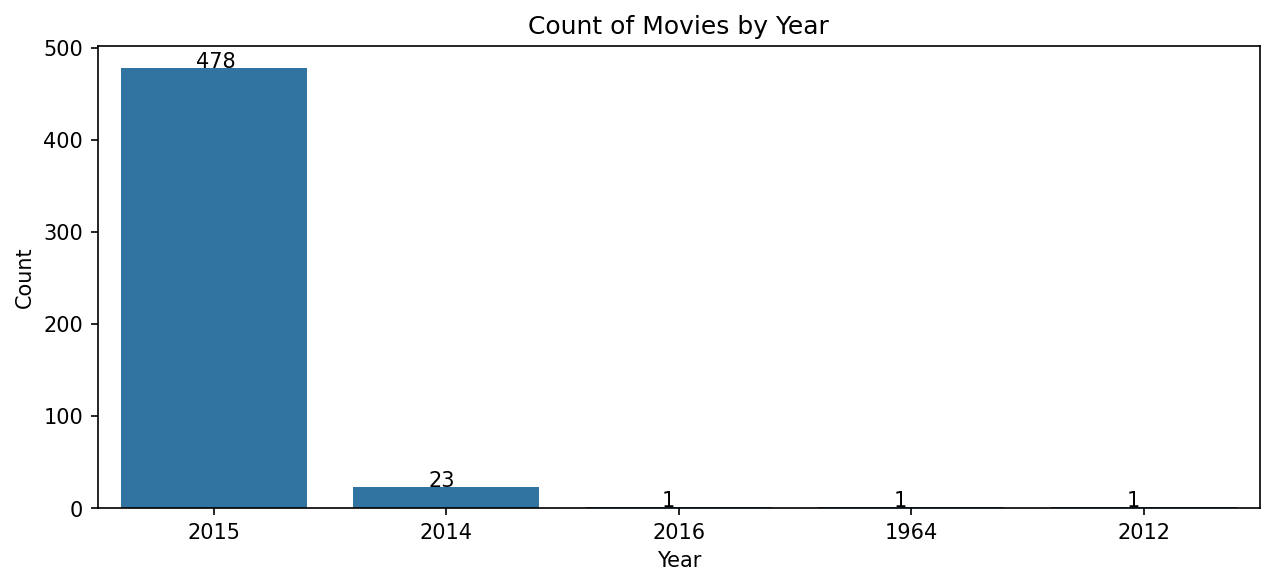

In [8]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
cnt_yr = sns.countplot(data=fandango, x='year', color = 'tab:blue' )

for p, label in zip(cnt_yr.patches, fandango['year'].value_counts()):
    cnt_yr.annotate(label, (p.get_x()+0.325, p.get_height()+0.15))
plt.xlabel("Year")
plt.ylabel("Count")
plt.title('Count of Movies by Year'); 

What are the 10 movies with the highest number of votes?

In [9]:
print("Top 10 Movies in Fandango by Number of Votes")
top_10 = fandango.nlargest(10,'votes')
top_10.pipe(ChangeCharacters)

Top 10 Movies in Fandango by Number of Votes


,Film,Fandango Stars,Fandango True Rating,Votes,Year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Lets find out how many movies have zero votes, exclude them and then visualize differences in distributions.



In [10]:
# Filter votes by 0 and then sum them up
print("Number of Movies with Zero Votes")
no_votes = fandango['votes']==0
no_votes.sum()


Number of Movies with Zero Votes


69

In [11]:
# Create subset with only movies that have no votes 
reviewed = fandango[fandango['votes']>0]

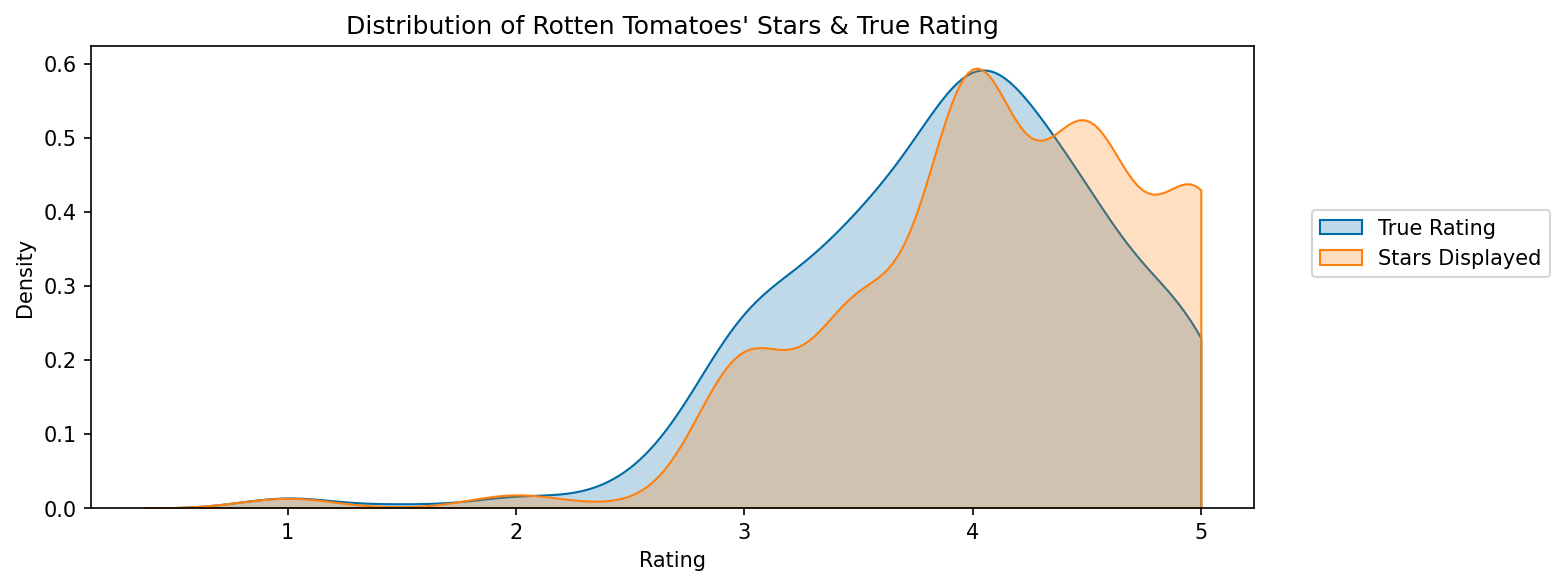

In [12]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=reviewed, x = 'fandango_true_rating', clip=[0,5], fill=True, label = 'True Rating')
sns.kdeplot(data=reviewed,x='fandango_stars',clip=[0,5],fill=True,label='Stars Displayed')

plt.xlabel("Rating")
plt.legend(loc=(1.05,0.5))
plt.title("Distribution of Rotten Tomatoes' Stars & True Rating");

Overall, Fandango's displayed stars are more skewed to the left than its actual true ratings. 

Let's now actually quantify this discrepancy and create a count plot to display the number of times a certain difference occurs. 

In [13]:
reviewed["stars_diff"] = reviewed['fandango_stars'] - reviewed['fandango_true_rating'] 
reviewed['stars_diff'] = reviewed['stars_diff'].round(2); 

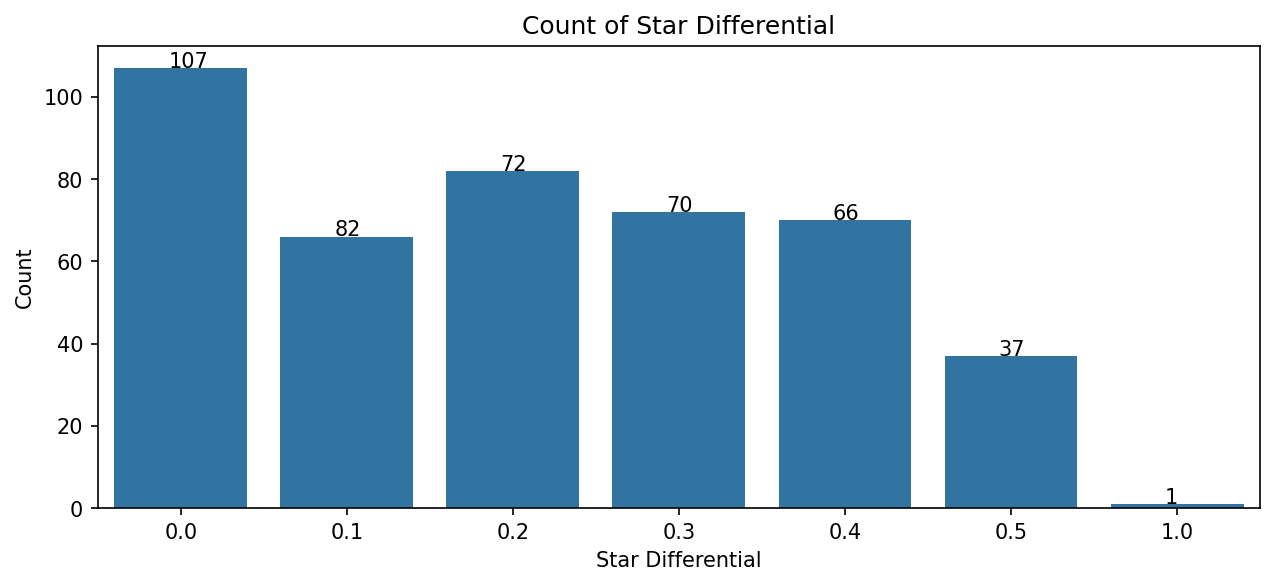

In [14]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
cnt_star = sns.countplot(data=reviewed, x='stars_diff', color = 'tab:blue')

for p, label in zip(cnt_star.patches, reviewed['stars_diff'].value_counts()):
    cnt_star.annotate(label, (p.get_x()+0.325, p.get_height()+0.15))
plt.xlabel("Star Differential")
plt.ylabel("Count")
plt.title('Count of Star Differential'); 

We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?

In [15]:
print("Movie with 1 Star Differential")
onestar = reviewed[reviewed['stars_diff']==1]
onestar.pipe(ChangeCharacters)

Movie with 1 Star Differential


,Film,Fandango Stars,Fandango True Rating,Votes,Year,Stars Diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [16]:
all_sites = pd.read_csv("all_sites_scores.csv")
all_sites.columns= all_sites.columns.str.lower()
all_sites.rename(columns = {'rottentomatoes': 'rotten_tomatoes', 'rottentomatoes_user': 'rotten_tomatoes_user'}, inplace= True)

### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. Rotten Tomatoes has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

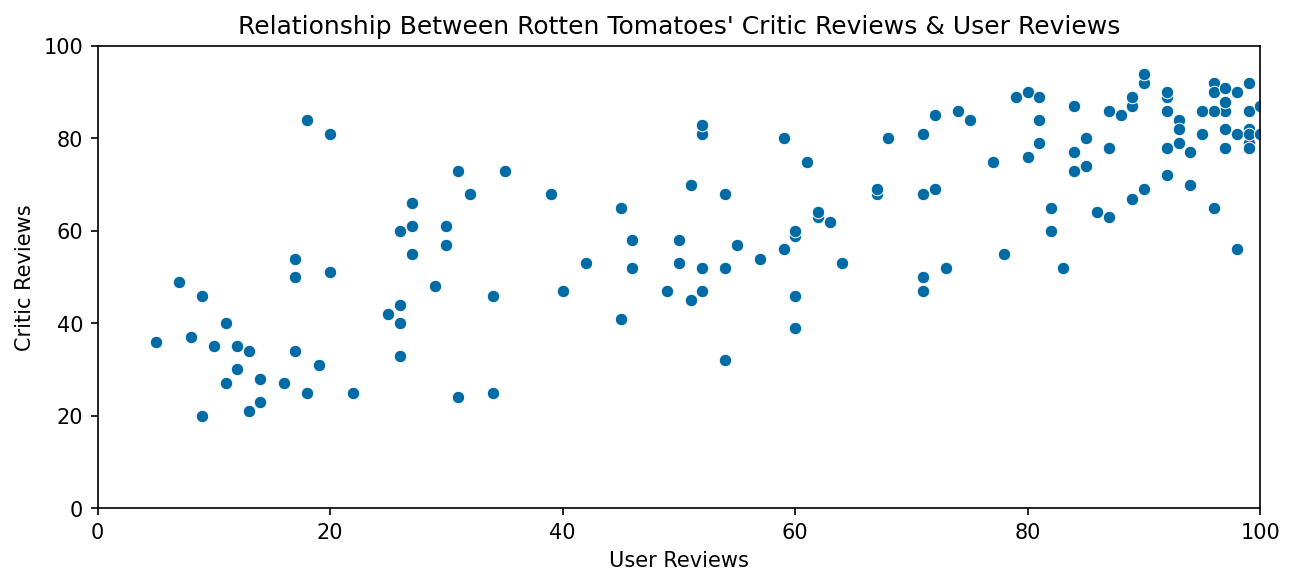

In [17]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='rotten_tomatoes',y='rotten_tomatoes_user')
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel("User Reviews")
plt.ylabel("Critic Reviews")
plt.title("Relationship Between Rotten Tomatoes' Critic Reviews & User Reviews");

Based on the figure above, critic and user reviews have a moderately liner relationship, that is their reviews for the most part align. 

Now, let's quantify this difference by comparing the critics ratings and the user ratings. By calculating critics - user scores, values closer to 0 means aggrement between critics and users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

In [18]:
all_sites["rt_diff"] = all_sites['rotten_tomatoes'] - all_sites['rotten_tomatoes_user'] 
all_sites['rt_diff'] = all_sites['rt_diff'].round(2); 

Let's now compare the overall mean difference in their *absolute value*. 

In [19]:
# Since we're dealing with differences that could be negative or positive, we use the absolute value of all the differences.
print("Mean Difference Between Rotten Tomatoes' Critic and User Scores")
all_sites['rt_diff'].apply(abs).mean().round(2)

Mean Difference Between Rotten Tomatoes' Critic and User Scores


15.1

What is the distribution of the differences between Rotten Tomatoes' critics and user scores?

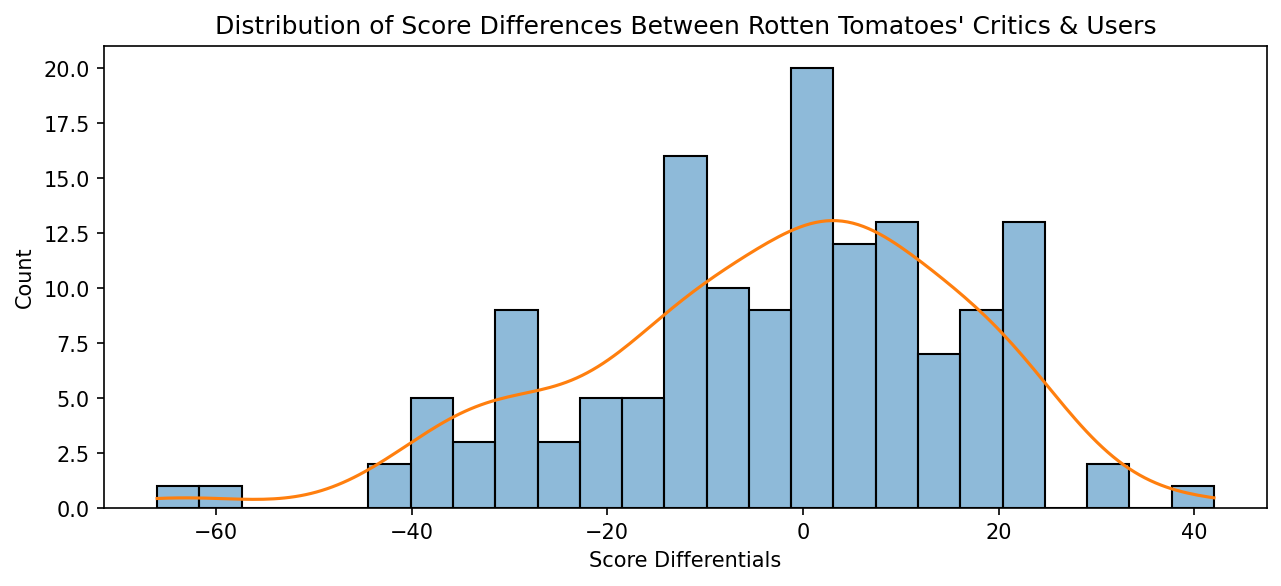

In [20]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
rt = sns.histplot(data=all_sites, x='rt_diff', color = 'tab:blue', kde= True, bins=25)

rt.lines[0].set_color('tab:orange')
plt.xlabel("Score Differentials")
plt.ylabel("Count")
plt.title("Distribution of Score Differences Between Rotten Tomatoes' Critics & Users"); 

For the most part, the distribution is slightly skewed to the left meaning critics scores films slightly higher than users. 

How big are the differences though? Lets visualize a distribution showing the *absolute value* difference between critics and users on Rotten Tomatoes.

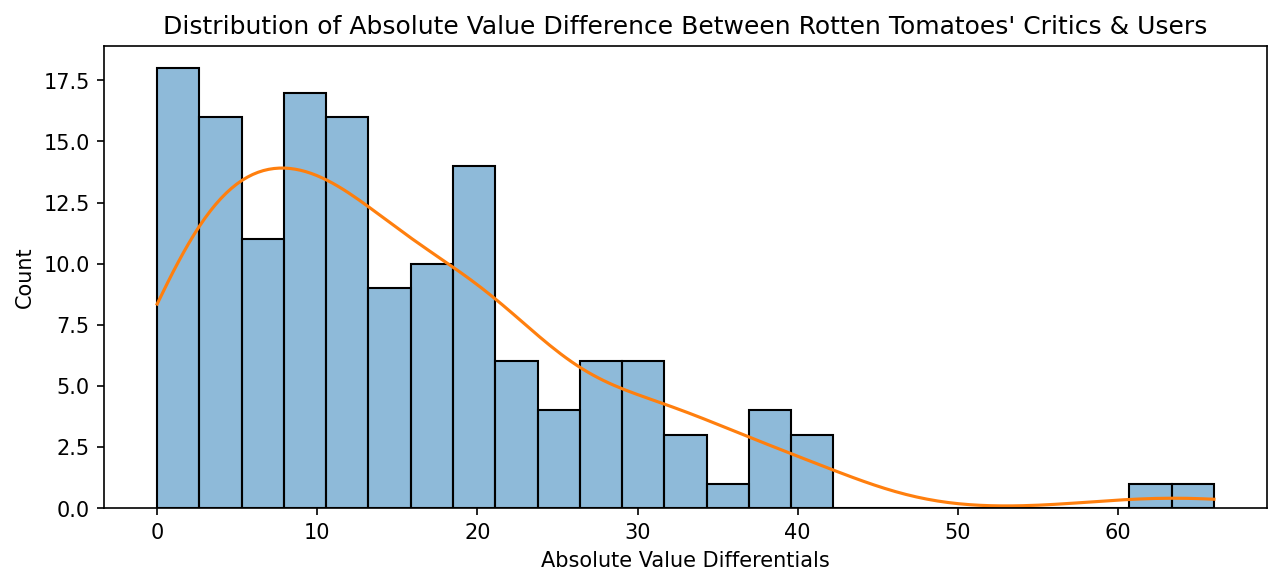

In [21]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
rt_abs = sns.histplot(x=all_sites['rt_diff'].apply(abs), color = 'tab:blue', kde= True, bins=25)

rt_abs.lines[0].set_color('tab:orange')
plt.xlabel("Absolute Value Differentials")
plt.ylabel("Count")
plt.title("Distribution of Absolute Value Difference Between Rotten Tomatoes' Critics & Users"); 

Overall, critics and user have a relative amount of difference between their reviews but nothing too substantial. Now, lets find out which movies are causing the largest differences.

What are the top 5 movies users rated higher than critics on average?

In [22]:
print("Movies Users Love but Critics Hate")
rt_labels = ['film','rotten_tomatoes', 'rotten_tomatoes_user', 'rt_diff']
users = all_sites.nsmallest(5,'rt_diff')[rt_labels]
users.pipe(ChangeCharacters)


Movies Users Love but Critics Hate


,Film,Rotten Tomatoes,Rotten Tomatoes User,Rt Diff
3,Do You Believe? (2015),18,84,-66
85,Little Boy (2015),20,81,-61
105,Hitman: Agent 47 (2015),7,49,-42
134,The Longest Ride (2015),31,73,-42
125,The Wedding Ringer (2015),27,66,-39


What are the top 5 movies critics score higher than users on average?

In [23]:
print("Movies Critics Love, but Users Hate")
critics =all_sites.nlargest(5,'rt_diff')[rt_labels]
critics.pipe(ChangeCharacters)

Movies Critics Love, but Users Hate


,Film,Rotten Tomatoes,Rotten Tomatoes User,Rt Diff
69,Mr. Turner (2014),98,56,42
112,It Follows (2015),96,65,31
115,While We're Young (2015),83,52,31
37,Welcome to Me (2015),71,47,24
40,I'll See You In My Dreams (2015),94,70,24


## MetaCritic

Now let's take a quick look at the ratings from Metacritic. Metacritic also shows an average user rating versus their official displayed rating.

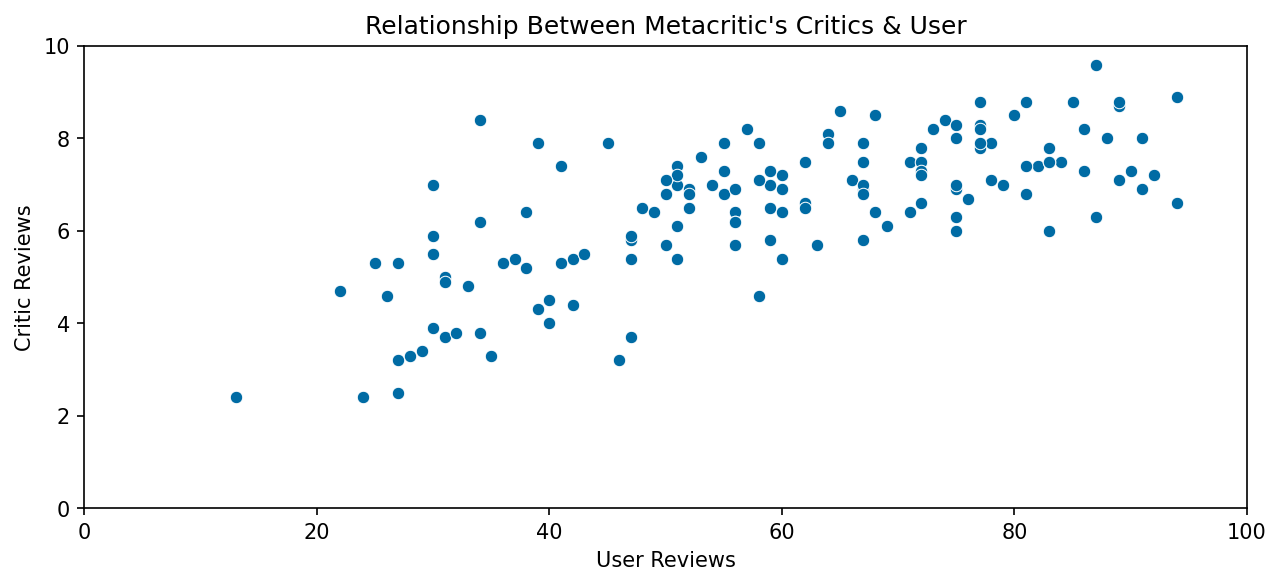

In [24]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='metacritic',y='metacritic_user')
plt.xlim(0,100)
plt.ylim(0,10)
plt.xlabel("User Reviews")
plt.ylabel("Critic Reviews")
plt.title("Relationship Between Metacritic's Critics & User");

Like Rotten Tomatoes, Metacritic's critic and user reviews have a moderately linear relationship meaning that they generally agree on movie ratings. 

## IMDB

Last but not least, let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

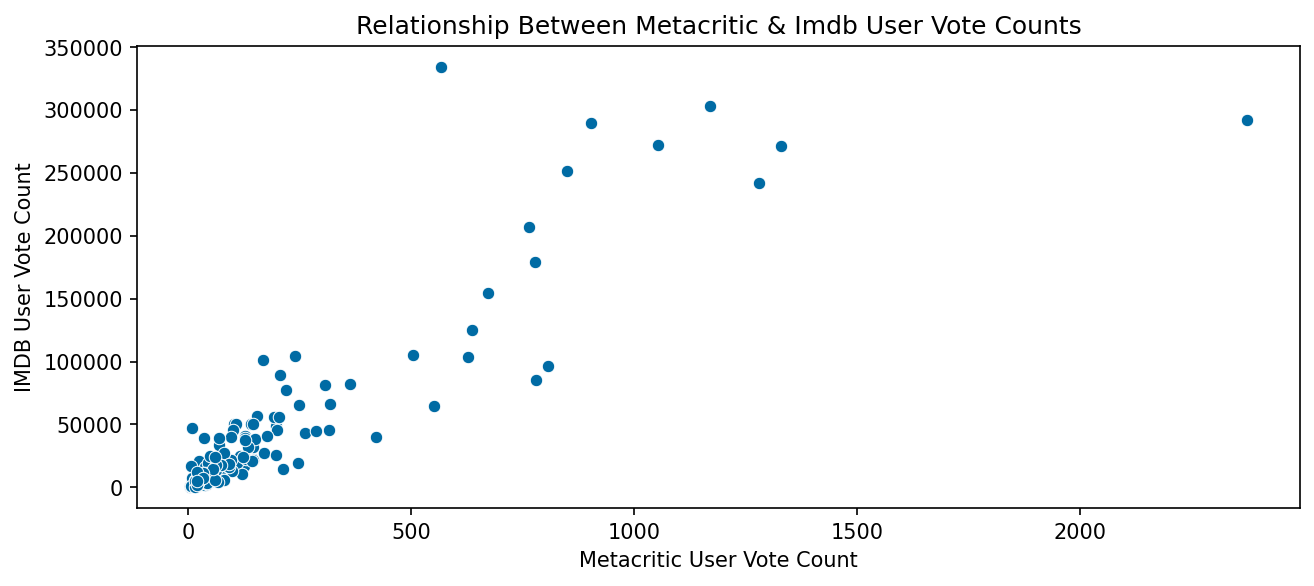

In [25]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='metacritic_user_vote_count',y='imdb_user_vote_count')
plt.xlabel("Metacritic User Vote Count")
plt.ylabel("IMDB User Vote Count")
plt.title('Relationship Between Metacritic & Imdb User Vote Counts'); 

Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?

What movie has the highest IMDB user vote count?

In [26]:
print("Movie with the Highest IMDB User Vote Count")
vote_labels = ['film', 'metacritic', 'metacritic_user', 'imdb', 'metacritic_user_vote_count', 'imdb_user_vote_count']
imdb_vote= all_sites.nlargest(1,'imdb_user_vote_count')[vote_labels]
imdb_vote.pipe(ChangeCharacters)

Movie with the Highest IMDB User Vote Count


,Film,Metacritic,Metacritic User,Imdb,Metacritic User Vote Count,Imdb User Vote Count
14,The Imitation Game (2014),73,8.2,8.1,566,334164


What movie has the highest Metacritic User Vote count?

In [27]:
print("Movie with the Highest Metacritic User Vote Count")
meta_vote =all_sites.nlargest(1,'metacritic_user_vote_count')[vote_labels]
meta_vote.pipe(ChangeCharacters)

Movie with the Highest Metacritic User Vote Count


,Film,Metacritic,Metacritic User,Imdb,Metacritic User Vote Count,Imdb User Vote Count
88,Mad Max: Fury Road (2015),89,8.7,8.3,2375,292023


## Fandango Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

In [28]:
# Not every movie in the Fandango table is in the All Sites table thus we only want to compare movies that are in both DataFrames.
df = pd.merge(fandango,all_sites,on='film',how='inner')

Notice that Rotten Tomatoes ,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.


In [29]:
ratings_normalize20 = ['rotten_tomatoes', 'rotten_tomatoes_user', 'metacritic']

df[ratings_normalize20] = np.round(df[ratings_normalize20].apply(lambda x:(x/20)),1)

In [30]:
ratings_normalize2 = ['imdb', 'metacritic_user']

df[ratings_normalize2] = np.round(df[ratings_normalize2].apply(lambda x:(x/2)),1)

In [31]:
norm_scores = df[df.columns[~df.columns.isin(['votes', 'year', 'metacritic_user_vote_count', 'imdb_user_vote_count', 'rt_diff'])]]

### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed ratings higher than stars, but are the ratings themselves higher than average?

In [32]:
dist_scores = norm_scores.copy()
dist_scores = dist_scores.pipe(ChangeCharacters)

In [33]:
# Function defined to aid in legend placement for histo and kde plots
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title='Movie Ratings', **kws)

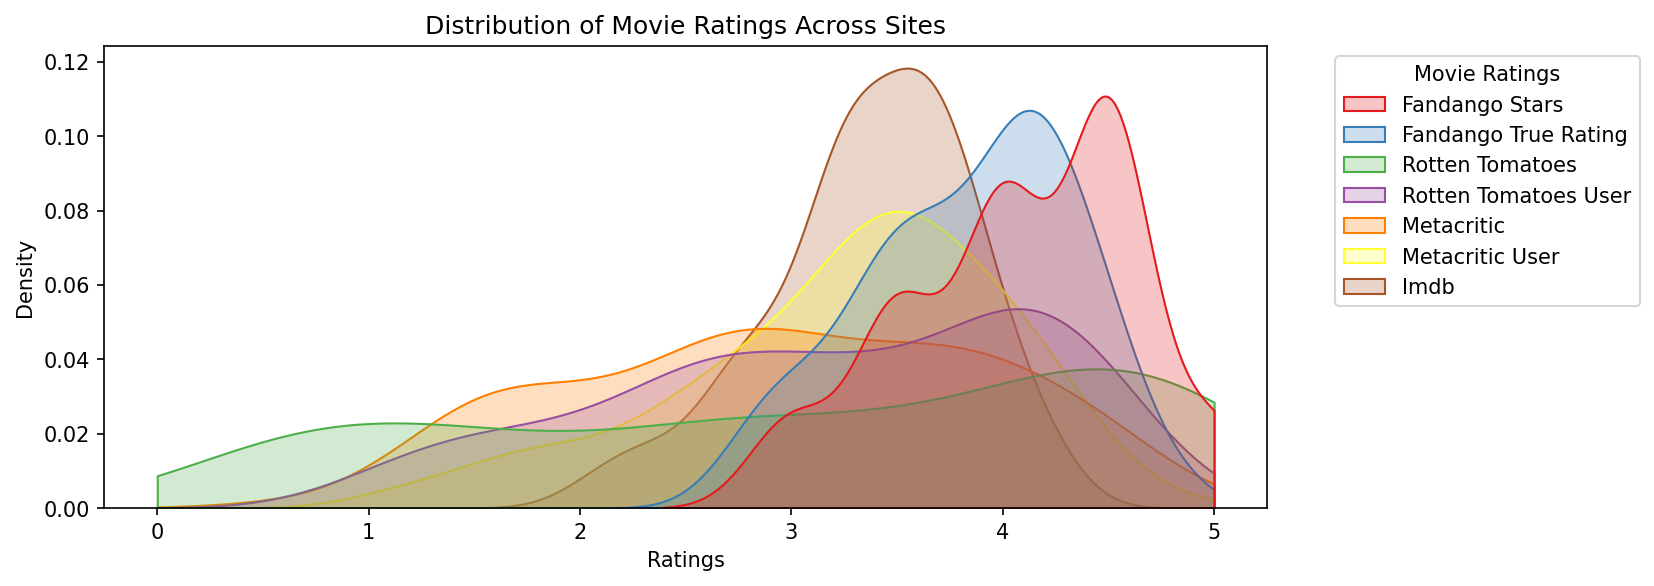

In [34]:
fig, ax = plt.subplots(figsize=(10,4),dpi=150)
sns.kdeplot(data=dist_scores,clip=[0,5],shade=True,palette='Set1', ax=ax)
move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.xlabel("Ratings")
plt.title('Distribution of Movie Ratings Across Sites'); 

Based on the figure above, Fandango has definitely has uneven distribution. We can also see that Rotten Tomatoes' critics have the most uniform distribution. Let's directly compare these two.

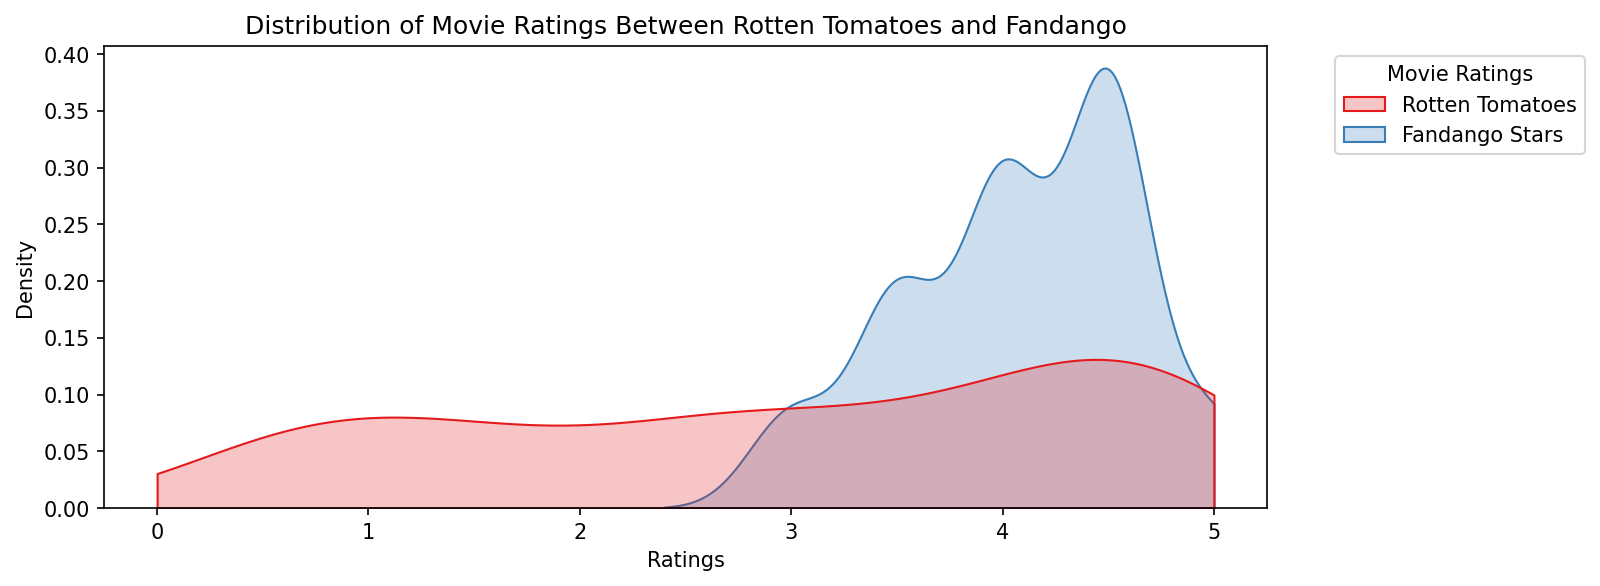

In [35]:
fig, ax = plt.subplots(figsize=(10,4),dpi=150)
sns.kdeplot(data=dist_scores[['Rotten Tomatoes','Fandango Stars']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.xlabel("Ratings")
plt.title('Distribution of Movie Ratings Between Rotten Tomatoes and Fandango');


### How are the worst movies rated across all platforms?

In [36]:
heat_map = norm_scores.copy()
#heat_map = heat_map[heat_map.columns[~heat_map.columns.isin(['film'])]]
heat_map  = heat_map.set_index('film')
heat_map = heat_map.pipe(ChangeCharacters)

<Figure size 1200x800 with 0 Axes>

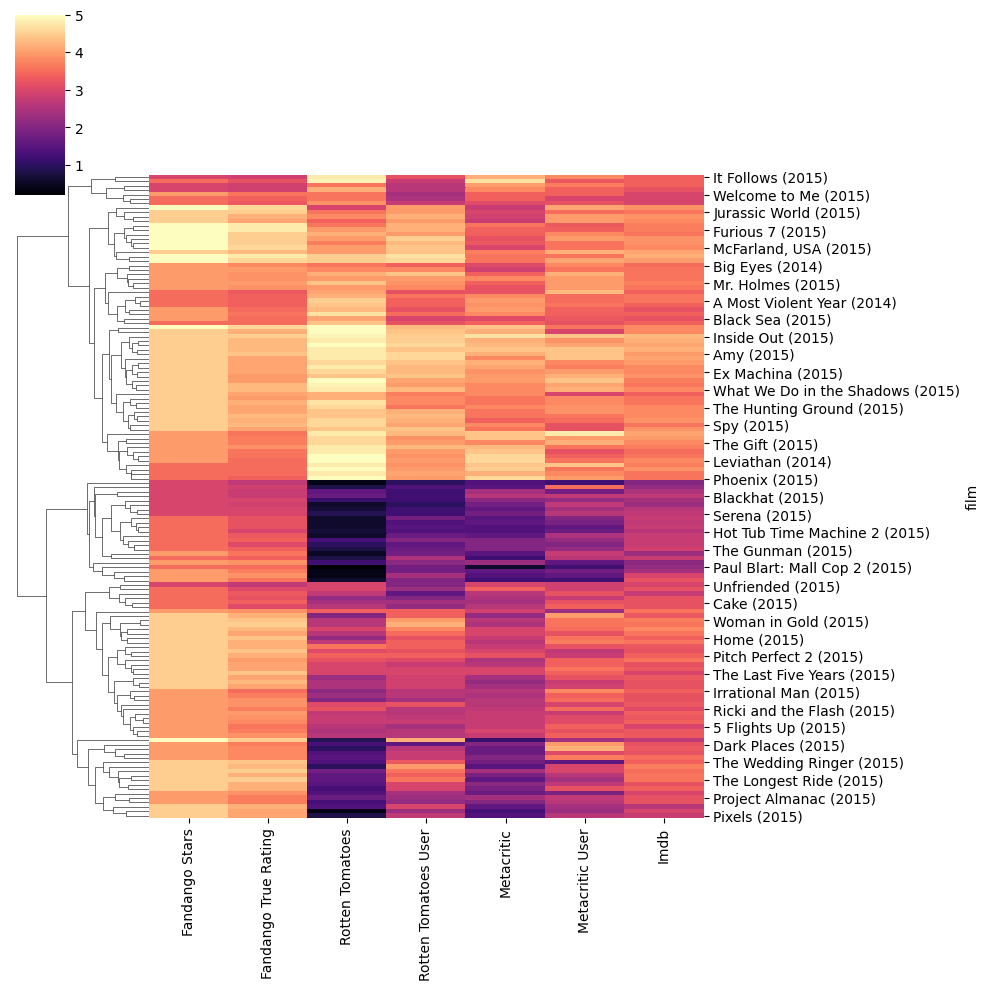

In [37]:
plt.figure(figsize=(12,8))
sns.clustermap(heat_map,cmap='magma',col_cluster=False);
#g.fig.subplots_adjust(right=0.7)
#g.ax_cbar.set_position((0.8, .2, .03, .4))

Clearly, Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes critic ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? 

In [38]:
print("Rotten Tomatoes Top 10 Worst Movies Reviewed by Critics Off")
worst_films = dist_scores.nsmallest(10,'Rotten Tomatoes')
worst_films

Rotten Tomatoes Top 10 Worst Movies Reviewed by Critics Off


,Film,Fandango Stars,Fandango True Rating,Rotten Tomatoes,Rotten Tomatoes User,Metacritic,Metacritic User,Imdb
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


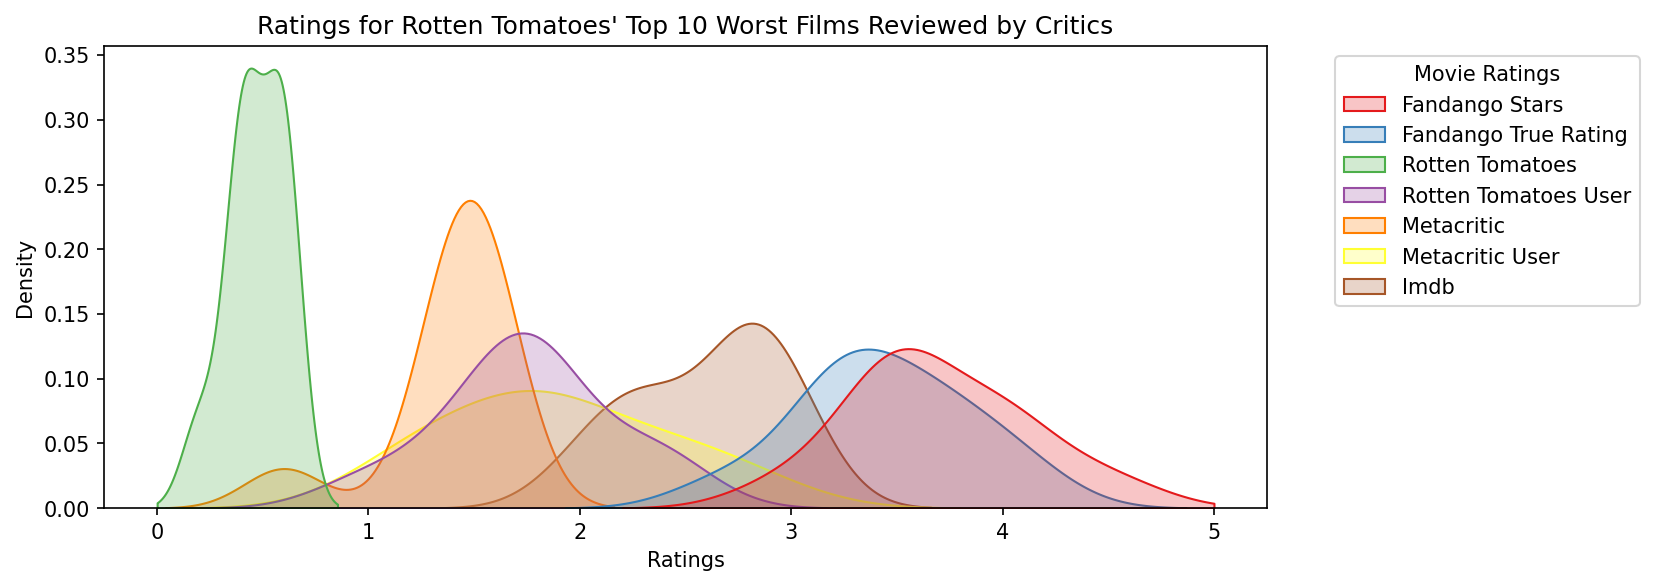

In [39]:
fig, ax= plt.subplots(figsize=(10,4),dpi=150)
worst_films = dist_scores.nsmallest(10,'Rotten Tomatoes')
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1', ax=ax)
move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.xlabel("Ratings")
plt.title("Ratings for Rotten Tomatoes' Top 10 Worst Films Reviewed by Critics");

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!

In [103]:
taken_3 = dist_scores.iloc[25]
print("Final Thoughts")
print("Fandango's Taken 3 Star Display: 4.5" )
print(f"Average Rating Across All Other Sites for Taken 3: {(0.4+2.3+1.3+2.3+3)/5}")
taken_3

Final Thoughts
Fandango's Taken 3 Star Display: 4.5
Average Rating Across All Other Sites for Taken 3: 1.86


Film                    Taken 3 (2015)
Fandango Stars                     4.5
Fandango True Rating               4.1
Rotten Tomatoes                    0.4
Rotten Tomatoes User               2.3
Metacritic                         1.3
Metacritic User                    2.3
Imdb                               3.0
Name: 25, dtype: object

----